# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Part1: K Means

In [3]:
#implement elbow method from scratch


def elbow(X, max_k, init_method):
    """
    Performs K-means clustering with a range of k values and plots the elbow curve.

    Parameters:
    X (array-like): The data to be clustered.
    max_k (int, optional): The maximum number of clusters to test. Default is 10.
    init_method (str, optional): The initialization method to use for K-means clustering.
        Can be 'k-means++' (default) or 'random'.

    Returns:
    None (plots the elbow curve using Matplotlib)
    """

    # calculate distortion for a range of number of cluster
    distortions = []
    K = range(1, max_k+1)
    for k in K:
        # initialize and fit KMeans algorithm with k clusters
        if init_method == 'k-means++':
            kmeans = KMeans(n_clusters=k, init='k-means++')
        elif init_method == 'random':
            kmeans = KMeans(n_clusters=k, init='random')
        else:
            raise ValueError("Invalid initialization method. Must be 'k-means++' or 'random'.")
        kmeans.fit(X)
        # calculate distortion (inertia) for the fitted model
        distortions.append(kmeans.inertia_)

    # plot the elbow curve
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()


In [4]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
print("10K images flattened: " , X.shape , " and 10k labels: " , y.shape)
# you can performs your training on train/test dataset alone if there are computational issues

10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


In [5]:
X.shape

(10000, 784)

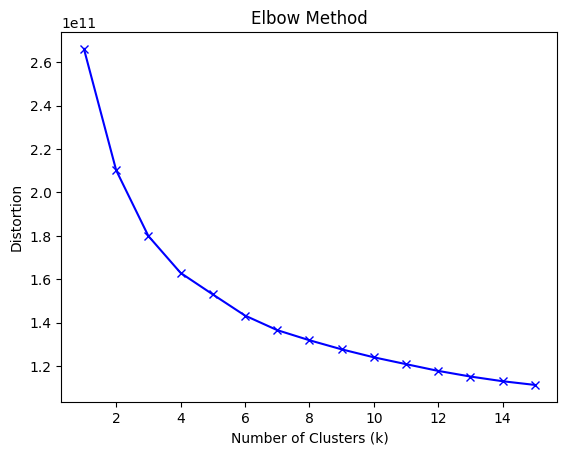

In [6]:
elbow(trainX.reshape(trainX.shape[0], -1), max_k=15, init_method='k-means++')

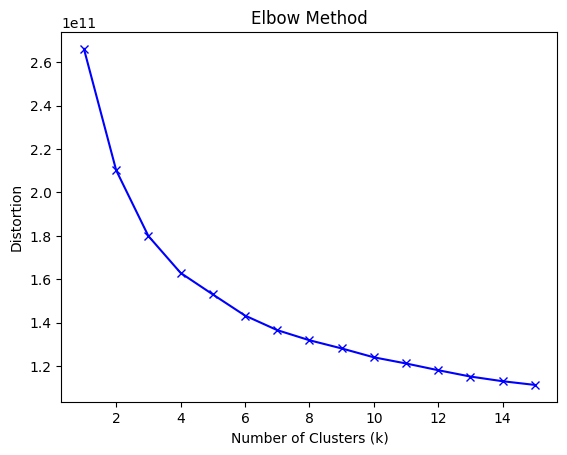

In [7]:
elbow(trainX.reshape(trainX.shape[0], -1), max_k=15, init_method='random')


In [8]:
#implement silhouette method from scratch
from sklearn.metrics import silhouette_samples
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score
import seaborn as sns
def silhouette(X, max_clusters, init_method):
    sil_score = []
    for i in range(3,max_clusters+1):
        labels=cluster.KMeans(n_clusters=i,init=init_method,random_state=200).fit(X).labels_
        score = metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)
        sil_score.append(score)
        print ("Silhouette score for k(clusters) = "+str(i)+" is "
            +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

   
    return  sil_score



In [9]:
sil_score = silhouette(trainX.reshape(trainX.shape[0], -1), max_clusters=15, init_method='k-means++')

Silhouette score for k(clusters) = 3 is 0.18968106297353055
Silhouette score for k(clusters) = 4 is 0.18545832544602037
Silhouette score for k(clusters) = 5 is 0.16335138151185322
Silhouette score for k(clusters) = 6 is 0.15352708064125237
Silhouette score for k(clusters) = 7 is 0.16163578403332263
Silhouette score for k(clusters) = 8 is 0.1463915865127416
Silhouette score for k(clusters) = 9 is 0.14884972481616077
Silhouette score for k(clusters) = 10 is 0.15224113738308354
Silhouette score for k(clusters) = 11 is 0.14579077747684469
Silhouette score for k(clusters) = 12 is 0.14410100563895178
Silhouette score for k(clusters) = 13 is 0.13531096853087218
Silhouette score for k(clusters) = 14 is 0.1290590028246968
Silhouette score for k(clusters) = 15 is 0.12414170524561091


<Axes: xlabel='Clusters', ylabel='Sil Score'>

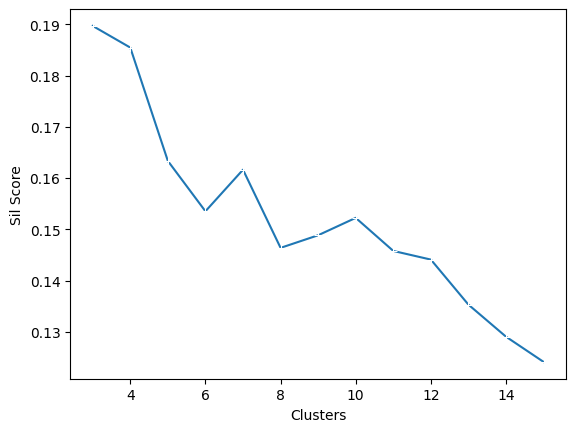

In [10]:
SK = range(3,16)
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")


In [11]:
sil_score = silhouette(trainX.reshape(trainX.shape[0], -1), max_clusters=15, init_method='random')

Silhouette score for k(clusters) = 3 is 0.1899106711677804
Silhouette score for k(clusters) = 4 is 0.18545832544602037
Silhouette score for k(clusters) = 5 is 0.16319749793451693
Silhouette score for k(clusters) = 6 is 0.15352708064125237
Silhouette score for k(clusters) = 7 is 0.16163578403332263
Silhouette score for k(clusters) = 8 is 0.14644133357060238
Silhouette score for k(clusters) = 9 is 0.14869947040067893
Silhouette score for k(clusters) = 10 is 0.14155880471316676
Silhouette score for k(clusters) = 11 is 0.14579077747684469
Silhouette score for k(clusters) = 12 is 0.14410100563895178
Silhouette score for k(clusters) = 13 is 0.13532496737056157
Silhouette score for k(clusters) = 14 is 0.12881226071351806
Silhouette score for k(clusters) = 15 is 0.12414170524561091


ValueError: All arrays must be of the same length

In [12]:
sil_centers = pd.DataFrame({'Clusters' : range(3,16), 'Sil Score' : sil_score})


<Axes: xlabel='Clusters', ylabel='Sil Score'>

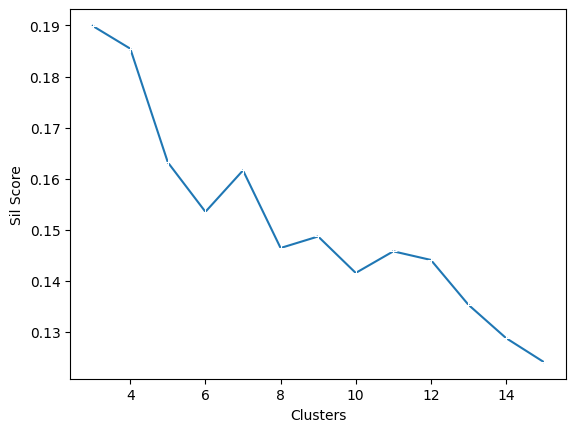

In [13]:
SK = range(3,16)
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

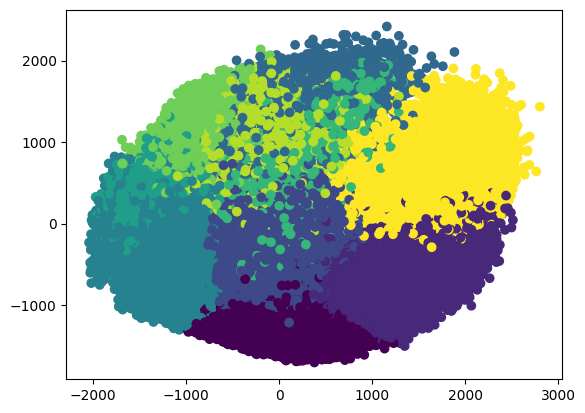

In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
# flatten the images into a 2D array for clustering
X = trainX.reshape(trainX.shape[0], -1)

# cluster the data using KMeans
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X)

# reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# plot the data points with different colors corresponding to their cluster labels
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels)
plt.show()

## Part2: Hierarchical clustering

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering(data_std, n_clusters,linkage_type):


    # perform hierarchical clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=linkage_type)
    cluster_labels = model.fit_predict(data_std)

    # reduce the dimensionality of the data to 2D using PCA

    # plot the results
    plt.scatter(data_std[:, 0], data_std[:, 1], c=cluster_labels)
    plt.title('Hierarchical Clustering ({} Clusters)'.format(n_clusters))
    plt.show()

    return data_std


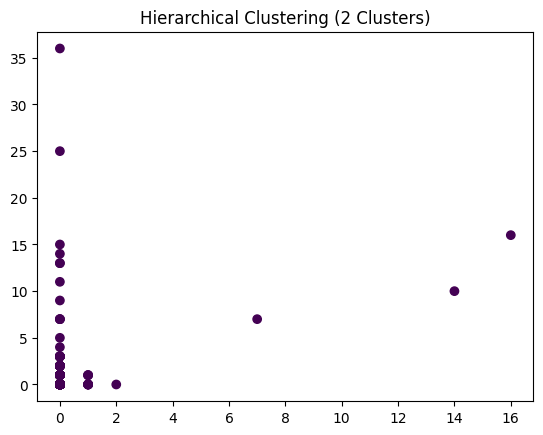

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
k = 2
# trainX.shape

hierarchical_clustering(X , k , 'single')

In [42]:
#visualize a dendogram
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.cluster.hierarchy as sch
# from sklearn.decomposition import PCA


# def dendogram(trainX):
#     # Use PCA to reduce the dimensionality of the input data
#     pca = PCA(n_components=50)
#     X_pca = pca.fit_transform(X)

#     # Calculate the distance matrix
#     dist = sch.distance.pdist(X_pca, metric='euclidean')

#     # Perform hierarchical clustering and plot the dendrogram
#     dendrogram = sch.dendrogram(sch.linkage(dist, method='ward'))

#     # Show the plot
#     plt.show()
  
# dendogram(X_2d)


NameError: name 'dist' is not defined

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
</br>
</br>
</br>





In [18]:
#visualisation of clusters using single linkage and complete linkage





**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
</br>
</br>
</br>

## Part3: Image Compression

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
from scipy import misc 
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

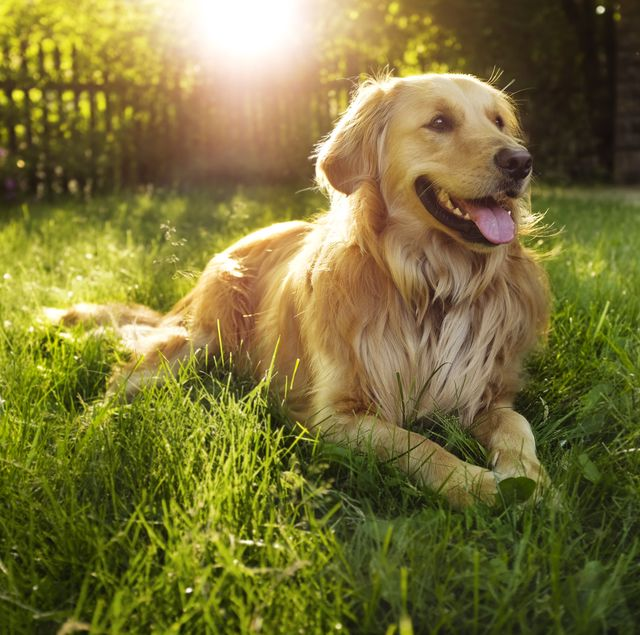

In [3]:
img = Image.open('dog.jpg')
mm = img
img

In [4]:

img_matrix = np.asarray(img)
     
print(img_matrix.shape)
img.height,img.width

(635, 640, 3)


(635, 640)

In [5]:
h = img.height
w = img.width
rgb = 3

In [6]:
img_matrix=np.reshape(img_matrix, (img.height*img.width,3))
img_matrix

array([[233, 232,  62],
       [230, 229,  59],
       [226, 225,  59],
       ...,
       [ 27,  31,  14],
       [ 26,  30,  15],
       [ 26,  30,  15]], dtype=uint8)

In [7]:
img_matrix.shape

(406400, 3)

In [8]:
# modelling

from sklearn.cluster import KMeans
kMeans = KMeans(n_clusters = 16)
kMeans.fit(img_matrix)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10,
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', n_clusters=16, n_init=10)

In [9]:

centroid =  np.array([list(kMeans.cluster_centers_[label]) for label in kMeans.labels_])
centroid = centroid.astype("uint8")
centroid
     

array([[208, 202,  69],
       [208, 202,  69],
       [208, 202,  69],
       ...,
       [ 38,  36,  15],
       [ 38,  36,  15],
       [ 38,  36,  15]], dtype=uint8)

In [10]:
centroids_reshaped = np.reshape(centroid, (h, w, rgb), "C")

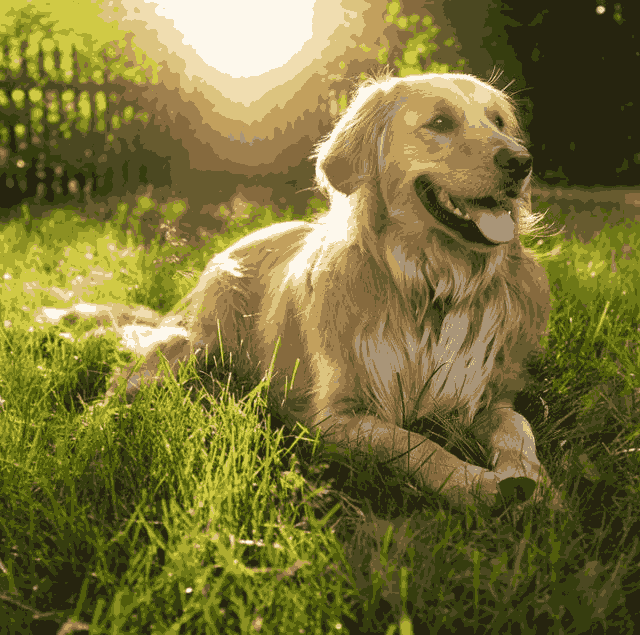

In [11]:

compressed_im = Image.fromarray(centroids_reshaped)
compressed_im.save("compressed.jpg")
compressed_im

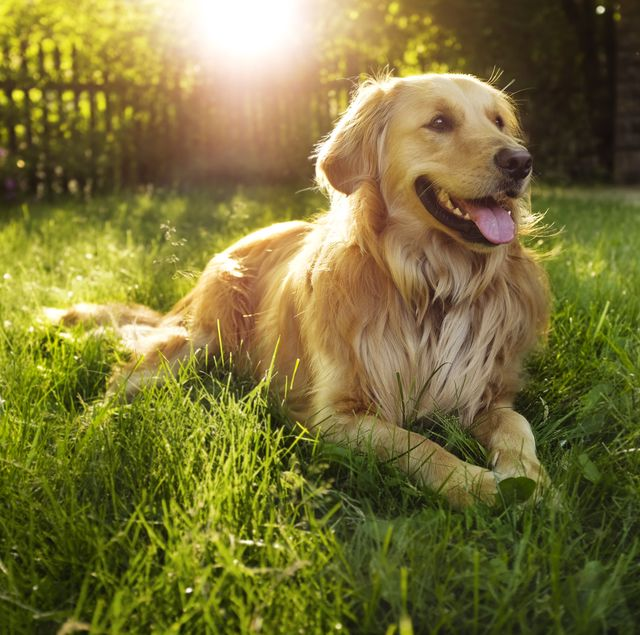

In [12]:
mm